In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [1]:
!pip install -U torch torchvision cython
!pip install -U 'git+https://github.com/facebookresearch/fvcore.git' 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
torch.__version__

!git clone https://github.com/invite-you/detectron2 detectron2_repo
!pip install -e detectron2_repo

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.4.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.5.0)
Requirement already up-to-date: cython in /usr/local/lib/python3.6/dist-packages (0.29.15)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-5447hv8a
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-5447hv8a
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-bqqyb2_p
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-bqqyb2_p
     |████████████████████████████████| 276kB 12.4MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=41712 sha256=35e0b0de11722ad7a737f7657d461c5e388a819c12954ab2ddbef5ab42635081
  Stored in directory: /tmp/pip-ephem-wheel-cache-zhfojago/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel 

In [0]:
# 인스톨이 완료되면 Colab Runtime을 다시 시작해주세요. 

# 기본 설정
# detectron2 logger 설정
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# 자주 사용하는 라이브러리 임폴트
import numpy as np
import cv2
import random
import os
from google.colab.patches import cv2_imshow

import glob
import math

# 자주 사용하는 detectron2 유틸 임폴트 
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
base_dir = r"/content/gdrive/My Drive/findShip/custom_coco/"

annt_file = os.path.join(base_dir, 'annotations', "instances_train2017.json")
image_dir = os.path.join(base_dir, 'train2017')

register_coco_instances("ship_dataset_train", {}, annt_file, image_dir)

annt_file = os.path.join(base_dir, 'annotations', "instances_val2017.json")
image_dir = os.path.join(base_dir, 'val2017')

register_coco_instances("ship_dataset_test", {}, annt_file, image_dir)

In [93]:
train_metadata = MetadataCatalog.get("ship_dataset_train")
train_dicts = DatasetCatalog.get("ship_dataset_train")

test_metadata = MetadataCatalog.get("ship_dataset_test")
test_dicts = DatasetCatalog.get("ship_dataset_test")


[03/04 01:25:00 d2.data.datasets.coco]: Loaded 7904 images in COCO format from /content/gdrive/My Drive/findShip/custom_coco/annotations/instances_train2017.json
[03/04 01:25:01 d2.data.datasets.coco]: Loaded 201 images in COCO format from /content/gdrive/My Drive/findShip/custom_coco/annotations/instances_val2017.json


In [0]:
base_path = "/content/gdrive/My Drive/findShip/test_images/*"

path = glob.glob(base_path)
files = [file for file in path if file.endswith(".png")]

In [5]:
files[20]

'/content/gdrive/My Drive/findShip/test_images/83.png'

In [6]:
index =  20
image_size = 1024

img = cv2.imread(files[index])
plt.imshow(img, interpolation='nearest')  
height, width, _ = img.shape

loopx = math.ceil(width / image_size)
loopy = math.ceil(height / image_size)

for x in range(0, loopx):
    minX = image_size * x
    maxX = image_size * (x+1)
    if maxX > width:
        minX = width - image_size
        maxX = width        
    for y in range(0, loopy):
        minY = image_size * y
        maxY = image_size * (y+1)
        if maxY > height:
            minY = height - image_size
            maxY = height

        print(minY,maxY, minX,maxX)
        plt.figure()
        plt.imshow(img[minY:maxY, minX:maxX])



In [20]:
area

(0, 1024, 1024, 1024)

In [0]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import cv2
from detectron2 import model_zoo

from google.colab.patches import cv2_imshow

pretrained_model = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"

cfg = get_cfg()

cfg.merge_from_file(
  model_zoo.get_config_file( pretrained_model)
)

cfg.MODEL.WEIGHTS = os.path.join(os.path.join(base_dir, 'models', 'mask_rcnn_R_101_FPN_3x_new_add_transform', "model_final.pth"))

cfg.MODEL.BACKBONE.FREEZE_AT = 4

cfg.MODEL.RPN.NMS_THRESH = 0.1
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.1
cfg.MODEL.RETINANET.NMS_THRESH_TEST = 0.1

cfg.DATALOADER.REPEAT_THRESHOLD = 1.0

cfg.DATASETS.TRAIN = ("ship_dataset_train",)
cfg.DATASETS.TEST = ("ship_dataset_test",)   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 15

cfg.MODEL.ANCHOR_GENERATOR.ANGLES: [[-15, -30, -45, -60, -75, -90, -105, -120, -135, -150, -165, -180, -270, -285, -300, -315, -330, -345, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 270, 285, 300, 315, 330, 345]]
cfg.MODEL.ANCHOR_GENERATOR.ASPECT_RATIOS = [[0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]]

cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.002
cfg.SOLVER.MAX_ITER = 2000    # 300 iterations seems good enough, but you can certainly train longer
cfg.SOLVER.STEPS = (30000,)
cfg.SOLVER.GAMMA = 0.15
cfg.SOLVER.MOMENTUM = 0.9

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 1024   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = len(train_metadata.thing_classes)  # only has one class (ballon)

# Create predictor
predictor = DefaultPredictor(cfg)

In [98]:
image_file = '/content/gdrive/My Drive/findShip/images/0.png'
image_file = '/content/gdrive/My Drive/findShip/custom_coco/val2017/0_1280_1920.png'
img = cv2.imread(image_file)
# Make prediction
outputs = predictor(img)

v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.3)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (18,18))
cv2_imshow(v.get_image()[:, :, ::-1])


In [56]:
image_file = '/content/gdrive/My Drive/findShip/images/0.png'
#image_file = '/content/gdrive/My Drive/findShip/custom_coco/val2017/0_1280_1920.png'
img = cv2.imread(image_file)
# Make prediction
outputs = predictor(img)

v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.3)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.figure(figsize = (18,18))
cv2_imshow(v.get_image()[:, :, ::-1])


In [121]:
['aircraft carrier', 'container', 'oil tanker', 'maritime vessels']
image = img.copy()

scores = outputs['instances'].scores.to("cpu").tolist()

classes = outputs['instances'].pred_classes.to("cpu").tolist()

masks = np.array(outputs['instances'].pred_masks.to("cpu"), dtype=bool)
masks = masks.astype(np.int8)

pred_rboxes = []
pred_classes = []
pred_scores = []
predicts = {}
predicts['rboxes']= pred_rboxes
predicts['classes']= pred_classes
predicts['scores']= pred_scores

for score, cls, mask in zip(scores, classes, masks):
    print("a")
    # 회전 박스 구하기
    mask_8bit = np.uint8(mask * 255)
    threshold_level = 127 # Set as you need...
    _, binarized = cv2.threshold(mask_8bit, threshold_level, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binarized, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) > 2:
        print("Error")
        raise
    contour = contours[0] 
    rbox = cv2.minAreaRect(contour)
    box = cv2.boxPoints(rbox)
    
    ## 이미지 출력
    #forimagebox = np.int0(box)
    #cv2.drawContours(image, [forimagebox], 0, (0, 255, 0), 3)
    
    # 클레스 값 구하기
    pred_rboxes.append(box.tolist())
    pred_classes.append(cls+1)
    pred_scores.append(score)


a
a
a
a
a
a
a


In [127]:
[ [x, y] for x, y in pred_rboxes[0] ]

[[550.4483642578125, 745.6542358398438],
 [311.4857482910156, 731.9992065429688],
 [314.45562744140625, 680.0260620117188],
 [553.418212890625, 693.6810913085938]]

In [138]:
os.path.basename(files[index])

'83.png'

In [0]:
base_path = "/content/gdrive/My Drive/findShip/test_images/*"

path = glob.glob(base_path)
files = [file for file in path if file.endswith(".png")]

In [0]:
index =  20
image_size = 1024

pred_rboxes = []
pred_classes = []
pred_scores = []
predicts = {}
predicts['rboxes']= pred_rboxes
predicts['classes']= pred_classes
predicts['scores']= pred_scores


img = cv2.imread(files[index])
plt.imshow(img, interpolation='nearest')  
height, width, _ = img.shape

loopx = math.ceil(width / image_size)
loopy = math.ceil(height / image_size)

for x in range(0, loopx):
    minX = image_size * x
    maxX = image_size * (x+1)
    if maxX > width:
        minX = width - image_size
        maxX = width        
    for y in range(0, loopy):
        minY = image_size * y
        maxY = image_size * (y+1)
        if maxY > height:
            minY = height - image_size
            maxY = height

        print(minY,maxY, minX,maxX)
        #plt.figure()
        #plt.imshow(img[minY:maxY, minX:maxX])

        # CSV 만들기 시작
        outputs = predictor(img[minY:maxY, minX:maxX])

        scores = outputs['instances'].scores.to("cpu").tolist()

        classes = outputs['instances'].pred_classes.to("cpu").tolist()

        masks = np.array(outputs['instances'].pred_masks.to("cpu"), dtype=bool)
        masks = masks.astype(np.int8)


        for score, cls, mask in zip(scores, classes, masks):
            print("a")
            # 회전 박스 구하기
            mask_8bit = np.uint8(mask * 255)
            threshold_level = 127 # Set as you need...
            _, binarized = cv2.threshold(mask_8bit, threshold_level, 255, cv2.THRESH_BINARY)
            contours, _ = cv2.findContours(binarized, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            if len(contours) > 2:
                print("Error")
                raise
            contour = contours[0] 
            rbox = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rbox)
            
            ## 이미지 출력
            #forimagebox = np.int0(box)
            #cv2.drawContours(image, [forimagebox], 0, (0, 255, 0), 3)
            
            # 클레스 값 구하기
            adjust_box = [ [x+minX, y+minY] for x, y in box.tolist() ]
            pred_rboxes.append(adjust_box)
            pred_classes.append(cls+1)
            pred_scores.append(score)

In [0]:
outputs

In [136]:
image = img.copy()
for box in pred_rboxes:
    forimagebox = np.int0(box)
    cv2.drawContours(image, [forimagebox], 0, (0, 255, 0), 3)

cv2_imshow(image)

In [142]:
files[0]

'/content/gdrive/My Drive/findShip/test_images/58.png'

In [0]:
from tqdm import tqdm

image_size = 1024

pred_rboxes = []
pred_classes = []
pred_scores = []
predicts = {}
predicts['rboxes']= pred_rboxes
predicts['classes']= pred_classes
predicts['scores']= pred_scores

det_dicts = []

base_path = "/content/gdrive/My Drive/findShip/test_images/*"

path = glob.glob(base_path)
files = [file for file in path if file.endswith(".png")]

for file in tqdm(files):
    img = cv2.imread(file)
    #plt.imshow(img, interpolation='nearest')  
    height, width, _ = img.shape

    loopx = math.ceil(width / image_size)
    loopy = math.ceil(height / image_size)

    for x in range(0, loopx):
        minX = image_size * x
        maxX = image_size * (x+1)
        if maxX > width:
            minX = width - image_size
            maxX = width        
        for y in range(0, loopy):
            minY = image_size * y
            maxY = image_size * (y+1)
            if maxY > height:
                minY = height - image_size
                maxY = height

            #plt.figure()
            #plt.imshow(img[minY:maxY, minX:maxX])

            # CSV 만들기 시작
            outputs = predictor(img[minY:maxY, minX:maxX])

            scores = outputs['instances'].scores.to("cpu").tolist()

            classes = outputs['instances'].pred_classes.to("cpu").tolist()

            masks = np.array(outputs['instances'].pred_masks.to("cpu"), dtype=bool)
            masks = masks.astype(np.int8)


            for score, cls, mask in zip(scores, classes, masks):
                # 회전 박스 구하기
                mask_8bit = np.uint8(mask * 255)
                threshold_level = 127 # Set as you need...
                _, binarized = cv2.threshold(mask_8bit, threshold_level, 255, cv2.THRESH_BINARY)
                contours, _ = cv2.findContours(binarized, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
                contour = max(contours, key = cv2.contourArea)
                """
                if len(contours) > 2:
                    print("Error")
                    raise
                contour = contours[0] 
                """
                
                rbox = cv2.minAreaRect(contour)
                box = cv2.boxPoints(rbox)
                
                ## 이미지 출력
                #forimagebox = np.int0(box)
                #cv2.drawContours(image, [forimagebox], 0, (0, 255, 0), 3)
                
                # 클레스 값 구하기
                adjust_box = [ [x+minX, y+minY] for x, y in box.tolist() ]
                pred_rboxes.append(adjust_box)
                pred_classes.append(cls+1)
                pred_scores.append(score)
                det_dicts.append({
                    'file_name': os.path.basename(file),
                    'class_id': cls+1,
                    'confidence': score,
                    'point1_x': adjust_box[0][0],
                    'point1_y': adjust_box[0][1],
                    'point2_x': adjust_box[1][0],
                    'point2_y': adjust_box[1][1],
                    'point3_x': adjust_box[2][0],
                    'point3_y': adjust_box[2][1],
                    'point4_x': adjust_box[3][0],
                    'point4_y': adjust_box[3][1],
                })

 15%|█▌        | 188/1240 [12:06<55:14,  3.15s/it]

In [0]:
def generator_filename():
    import datetime
    basename = "result"
    suffix = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
    filename = "_".join([basename, suffix])

dst_path = "/content/gdrive/My Drive/findShip/custom_coco/results/" + generator_filename()
with open(dst_path, 'w') as f:
    w = csv.DictWriter(f, ['file_name', 'class_id', 'confidence', 'point1_x', 'point1_y', 'point2_x', 'point2_y',
                            'point3_x', 'point3_y', 'point4_x', 'point4_y'])
    w.writeheader()
    for det_dict in det_dicts:
        w.writerow(det_dict)

In [148]:
file

'/content/gdrive/My Drive/findShip/test_images/70.png'

Error


RuntimeError: ignored

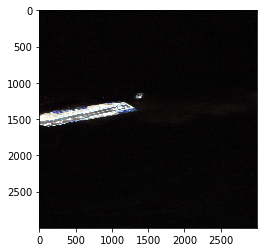

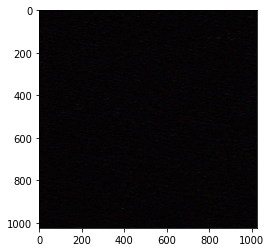

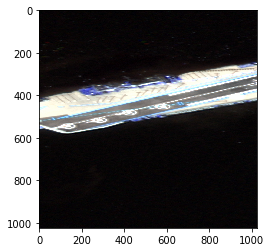

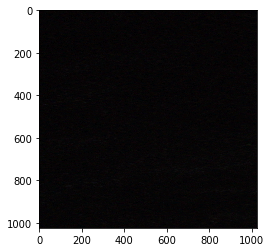

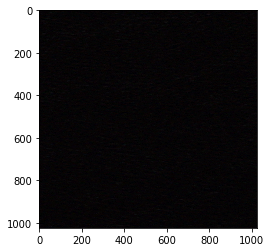

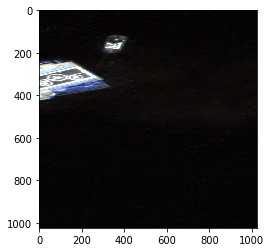

In [149]:
from tqdm import tqdm

image_size = 1024

pred_rboxes = []
pred_classes = []
pred_scores = []
predicts = {}
predicts['rboxes']= pred_rboxes
predicts['classes']= pred_classes
predicts['scores']= pred_scores

det_dicts = []

base_path = "/content/gdrive/My Drive/findShip/test_images/*"

path = glob.glob(base_path)
files = [file for file in path if file.endswith(".png")]

#for file in tqdm(files):
file = '/content/gdrive/My Drive/findShip/test_images/70.png'
img = cv2.imread(file)
plt.imshow(img, interpolation='nearest')  
height, width, _ = img.shape

loopx = math.ceil(width / image_size)
loopy = math.ceil(height / image_size)

for x in range(0, loopx):
    minX = image_size * x
    maxX = image_size * (x+1)
    if maxX > width:
        minX = width - image_size
        maxX = width        
    for y in range(0, loopy):
        minY = image_size * y
        maxY = image_size * (y+1)
        if maxY > height:
            minY = height - image_size
            maxY = height

        plt.figure()
        plt.imshow(img[minY:maxY, minX:maxX])

        # CSV 만들기 시작
        outputs = predictor(img[minY:maxY, minX:maxX])

        scores = outputs['instances'].scores.to("cpu").tolist()

        classes = outputs['instances'].pred_classes.to("cpu").tolist()

        masks = np.array(outputs['instances'].pred_masks.to("cpu"), dtype=bool)
        masks = masks.astype(np.int8)


        for score, cls, mask in zip(scores, classes, masks):
            # 회전 박스 구하기
            mask_8bit = np.uint8(mask * 255)
            threshold_level = 127 # Set as you need...
            _, binarized = cv2.threshold(mask_8bit, threshold_level, 255, cv2.THRESH_BINARY)
            contours, _ = cv2.findContours(binarized, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            contour = max(contours, key = cv2.contourArea)
            """
            if len(contours) > 2:
                print("Error")
                raise
            contour = contours[0] 
            """
            rbox = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rbox)
            
            ## 이미지 출력
            forimagebox = np.int0(box)
            cv2.drawContours(image, [forimagebox], 0, (0, 255, 0), 3)
            
            # 클레스 값 구하기
            adjust_box = [ [x+minX, y+minY] for x, y in box.tolist() ]
            pred_rboxes.append(adjust_box)
            pred_classes.append(cls+1)
            pred_scores.append(score)
            det_dicts.append({
                'file_name': os.path.basename(file),
                'class_id': cls+1,
                'confidence': score,
                'point1_x': adjust_box[0][0],
                'point1_y': adjust_box[0][1],
                'point2_x': adjust_box[1][0],
                'point2_y': adjust_box[1][1],
                'point3_x': adjust_box[2][0],
                'point3_y': adjust_box[2][1],
                'point4_x': adjust_box[3][0],
                'point4_y': adjust_box[3][1],
            })

In [0]:
c = max(contours, key = cv2.contourArea)

In [157]:
image = img.copy()
contours, _ = cv2.findContours(binarized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

contour = max(contours, key = cv2.contourArea)
rbox = cv2.minAreaRect(contour)
box = cv2.boxPoints(rbox)

## 이미지 출력
forimagebox = np.int0(box)
adjust_box = np.array([ [x+minX, y+minY] for x, y in forimagebox.tolist() ])
cv2.drawContours(image, [adjust_box], 0, (0, 255, 0), 3)

cv2_imshow(image)